In [4]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [6]:
db = CaseDB()

toload = [ 
    # dict(name="base", id="msn1a-from_hn2d1cc-noAFN_base_widev2", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="fix_eqns", id="faf1a-fix_eqns", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="new_a0.2", id="faf3a-1a_cxnn_nomfp_fixvth_a0.2", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="new_a0.6", id="faf3ab-1a_cxnn_nomfp_fixvth_a0.6", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="new_a1.0", id="faf3ac-1a_cxnn_nomfp_fixvth_a1.0", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="a1.0_frec0.68", id="faf3b-a1.0_frec0.68", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="fix_perpcond", id="faf3c-fix_cond_eqn_legon", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="braginskii", id="faf3d-braginskii_cond", unnormalise_geom = True, use_xhermes = True, squash = True), 

    # dict(name="base_AFN", id="hn2d1i-AFN_nocondlim_widev2", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case faf3a-1a_cxnn_nomfp_fixvth_a0.2
-----------------------
- Looking for squash file
- Squash file found. squash date 05/27/2024, 12:48:50, dmp file date 05/26/2024, 21:46:20


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case faf3ab-1a_cxnn_nomfp_fixvth_a0.6
-----------------------
- Looking for squash file
- Squash file found. squash date 05/30/2024, 10:19:01, dmp file date 05/27/2024, 18:03:07


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case faf3ac-1a_cxnn_nomfp_fixvth_a1.0
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case faf3b-a1.0_frec0.68
-----------------------
- Looking for squash file
- Squash file found. squash date 05/29/2024, 11:57:51, dmp file date 05/29/2024, 11:28:16


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case faf3c-fix_cond_eqn_legon
-----------------------
- Looking for squash file
- Squash file found. squash date 05/29/2024, 11:59:37, dmp file date 05/29/2024, 11:46:00


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case faf3d-braginskii_cond
-----------------------
- Looking for squash file
- Squash file found. squash date 05/29/2024, 12:01:13, dmp file date 05/30/2024, 09:48:23
- dmp files are newer than the squash file! Recreating...
- Done


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


# Read SOLEDGE

In [3]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

# Read SOLPS

In [7]:
solpscases = {
    # "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    # "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    # "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    # "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    # "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    # "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    # "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    # "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    # "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    # "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
    "tightwall_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19",
    "tightwall_noD2_1e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2",
    "tightwall_noD2_2e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2",
    "tightwall_noD2_3e19" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2",
    
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # sp[name].read_last10s(solpscases[name])
    sp[name].read_from_case(solpscases[name])

# Read Hermes-3

In [8]:
cs.keys()

dict_keys(['new_a0.2', 'new_a0.6', 'new_a1.0', 'a1.0_frec0.68', 'fix_perpcond', 'braginskii'])

In [9]:
hr = dict()
for name in cs.keys(): 
    print(name)
    hr[name] = Hermesdata()
    ds = cs[name].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    hr[name].read_case(ds)

    
    ds = cs[name].ds
    ds = calculate_radial_fluxes(ds, new_afn = True)
    # ds = calculate_target_fluxes(ds)
    ds = reverse_pfr_fluxes(ds)

new_a0.2
new_a0.6
new_a1.0
a1.0_frec0.68
fix_perpcond
braginskii


# Convergence

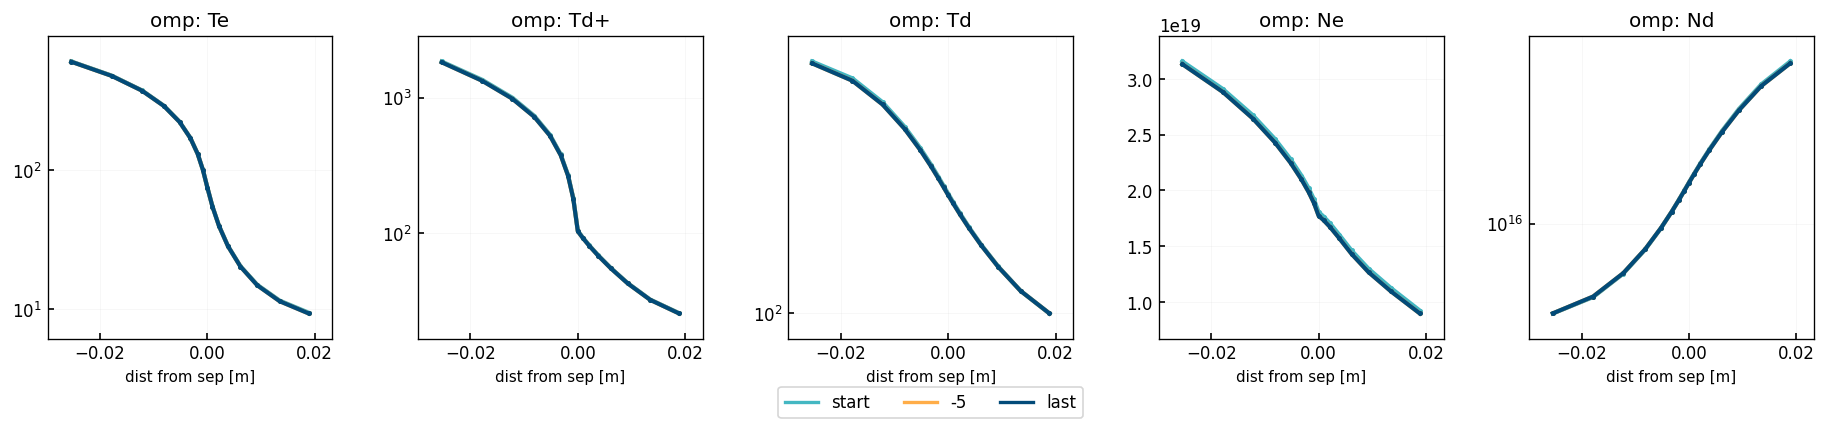

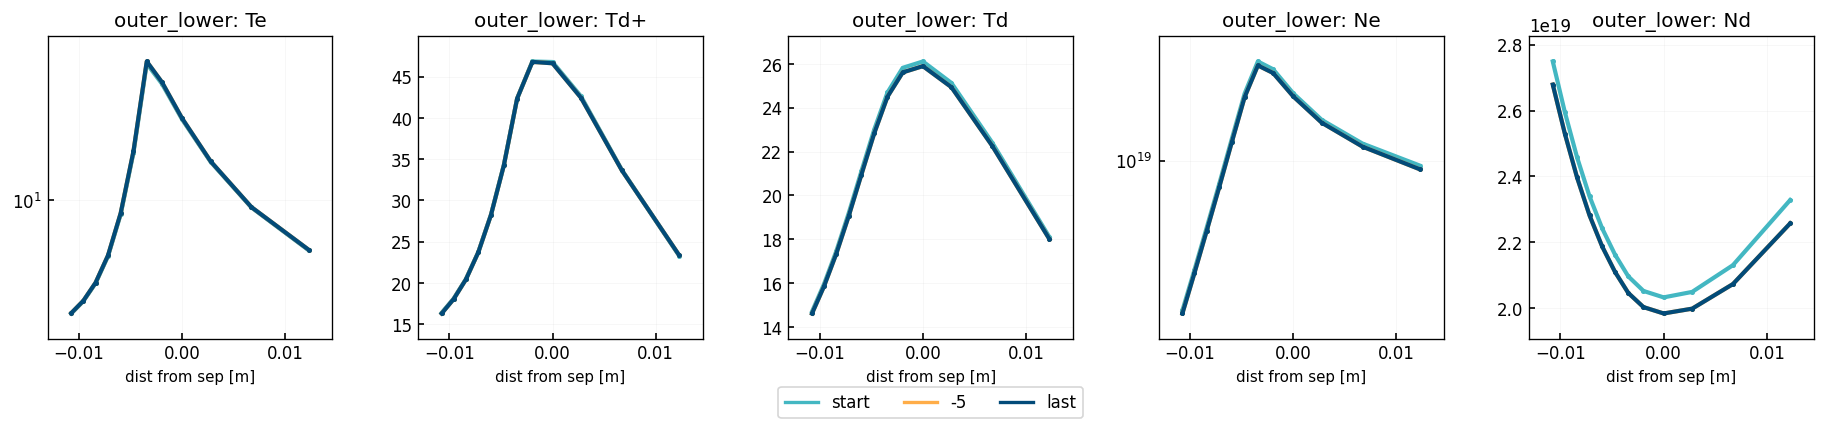

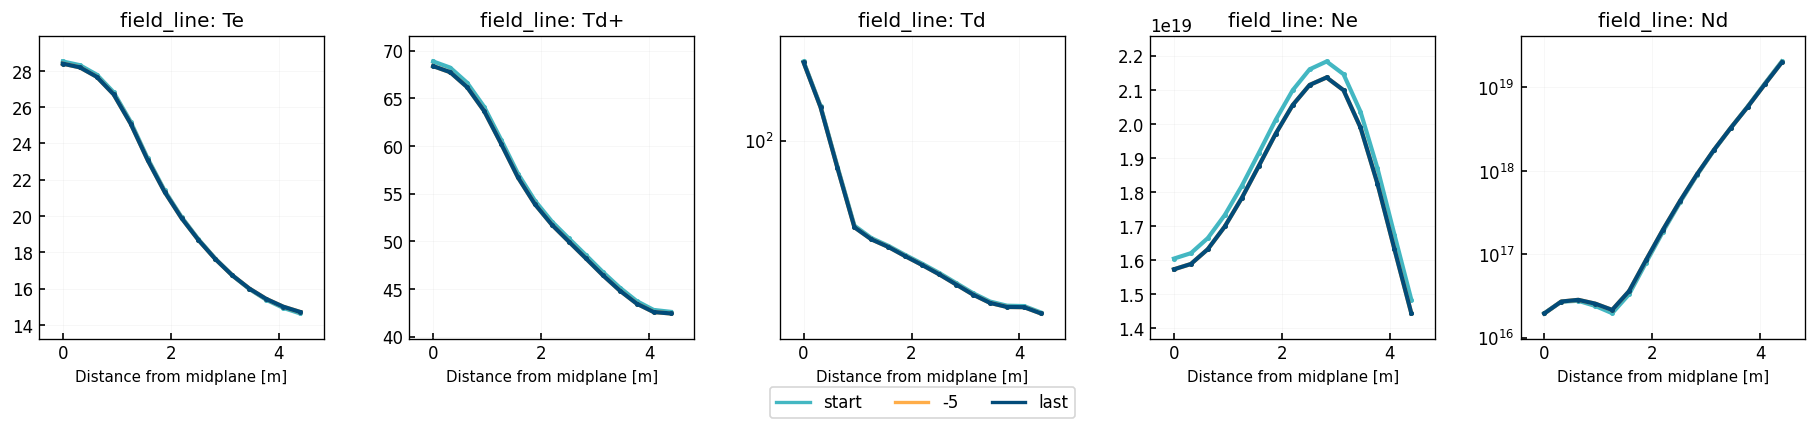

In [4]:
case = "floorfix_allfields"
lineplot(
    {
        "start":cs[case].ds.isel(t=0, x = slice(2,-2)),
        "-5":cs[case].ds.isel(t=-3, x = slice(2,-2)),
        "last":cs[case].ds.isel(t=-1, x = slice(2,-2)),
        # "base":cs["base"].ds.isel(t=-1, x = slice(2,-2)),

    },
    clean_guards = False,
    params = ["Te", "Td+", "Td", "Ne", "Nd"],
    regions = ["omp", "outer_lower", "field_line"],
)

# Implement lots of fixes
- Proper vth definition in limiter
- Correct equations
- Max MFP set to 1e4 (disabled)

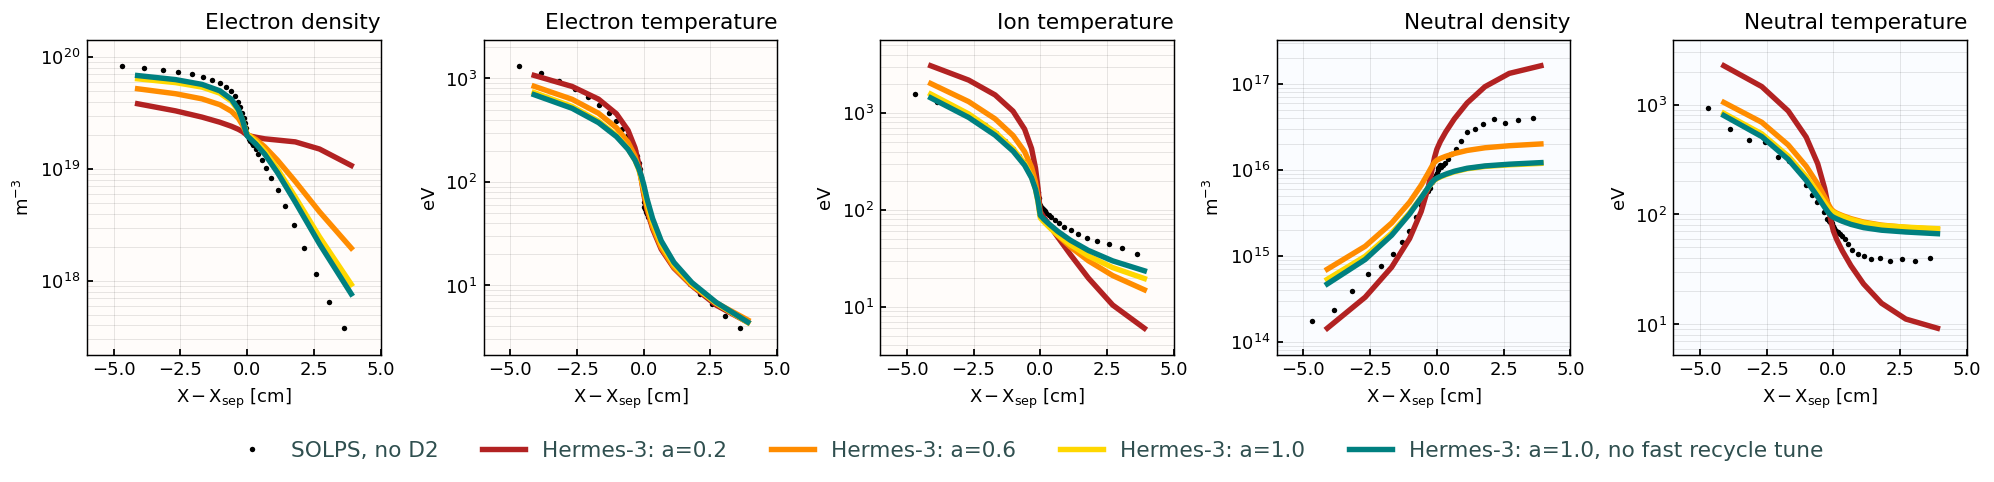

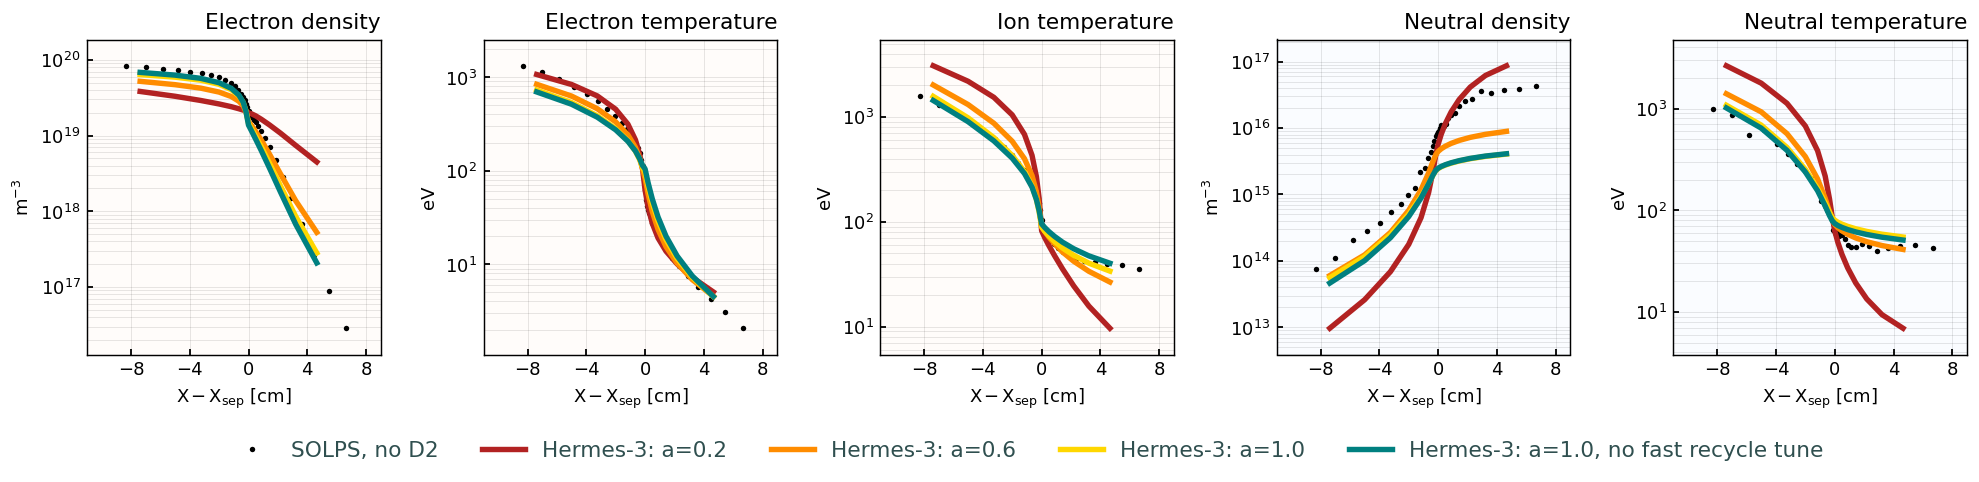

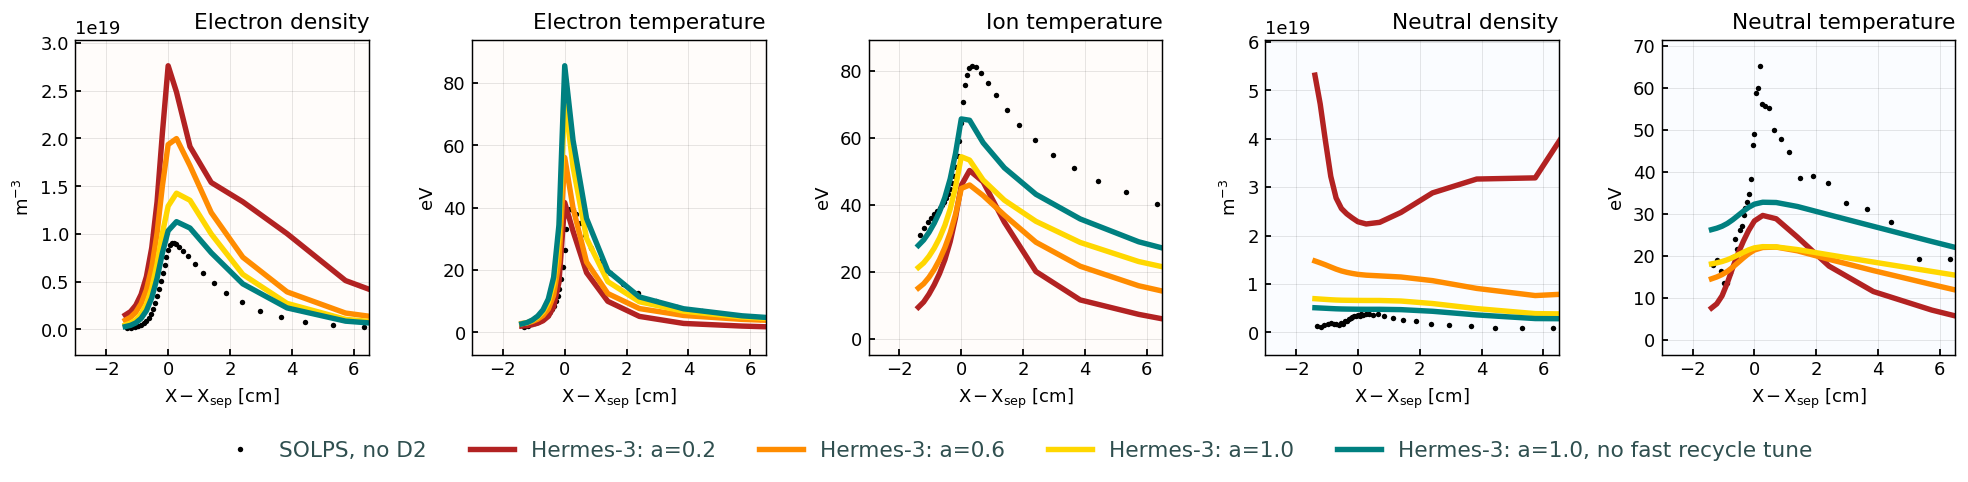

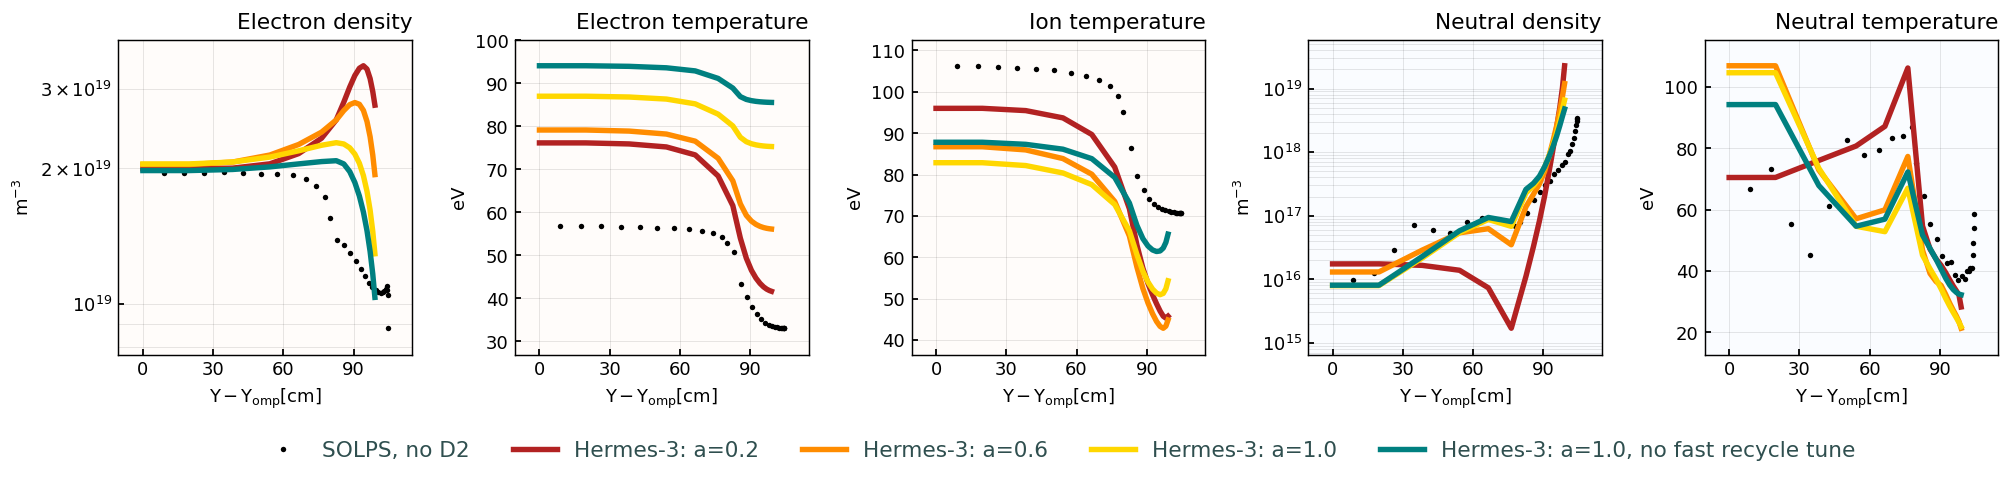

In [11]:
lineplot_compare(
    cases = { 
    "SOLPS, no D2" : dict(data=sp["tightwall_noD2_2e19"], color="black"),
    # "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    # r"Hermes-3: base" : dict(data=hr['base'], color = "teal"),
    # r"Hermes-3: Old limiter" : dict(data=hr['fix_eqns'], color = "darkorange"),
    r"Hermes-3: a=0.2" : dict(data=hr['new_a0.2'], color = "firebrick"),
    r"Hermes-3: a=0.6" : dict(data=hr['new_a0.6'], color = "darkorange"),
    r"Hermes-3: a=1.0" : dict(data=hr['new_a1.0'], color = "gold"),
    r"Hermes-3: a=1.0, no fast recycle tune" : dict(data=hr['a1.0_frec0.68'], color = "teal"),
    # r"Hermes-3: base, AFN" : dict(data=hr['base_AFN'], color = "firebrick"),

    },
    regions = ["omp", "imp", "outer_lower", "outer_fieldline"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = False
)

## Impact of fast recycling and conduction

In [7]:
cs.keys()

dict_keys(['new_a0.2', 'new_a0.6', 'new_a1.0', 'a1.0_frec0.68', 'fix_perpcond', 'braginskii'])

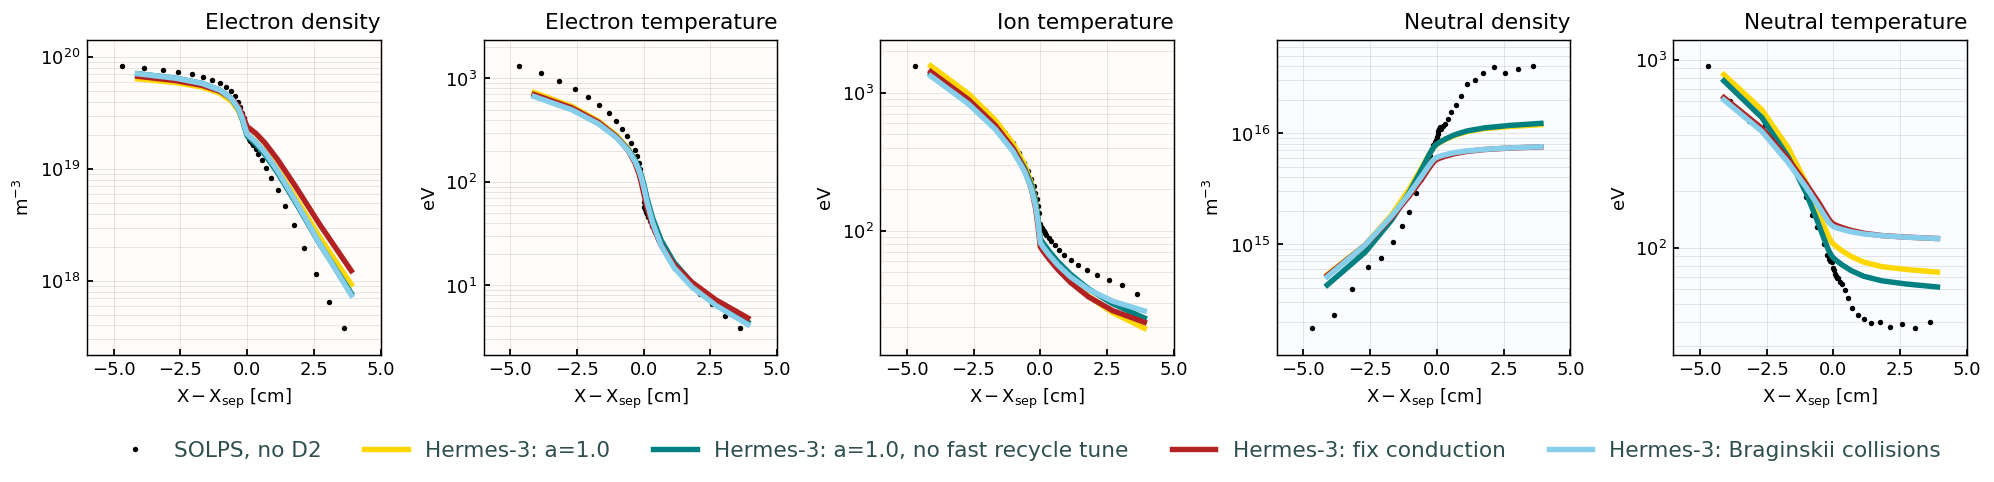

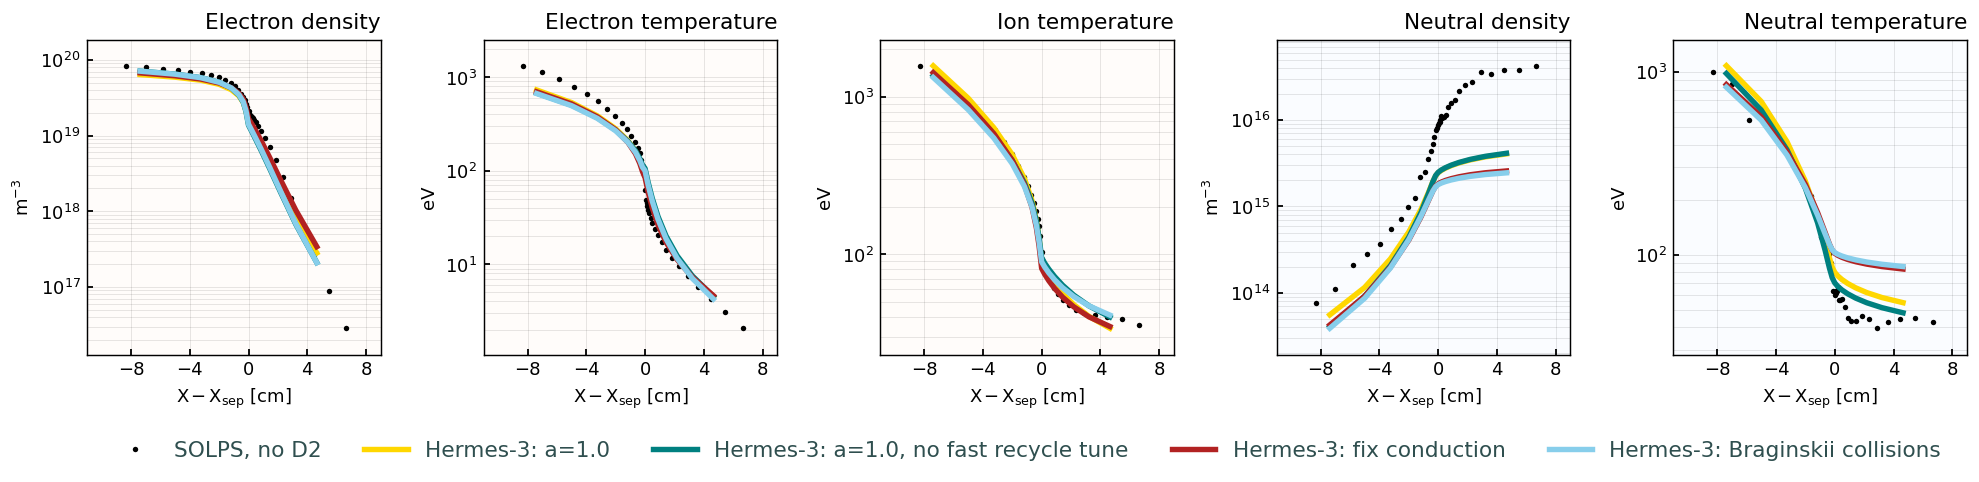

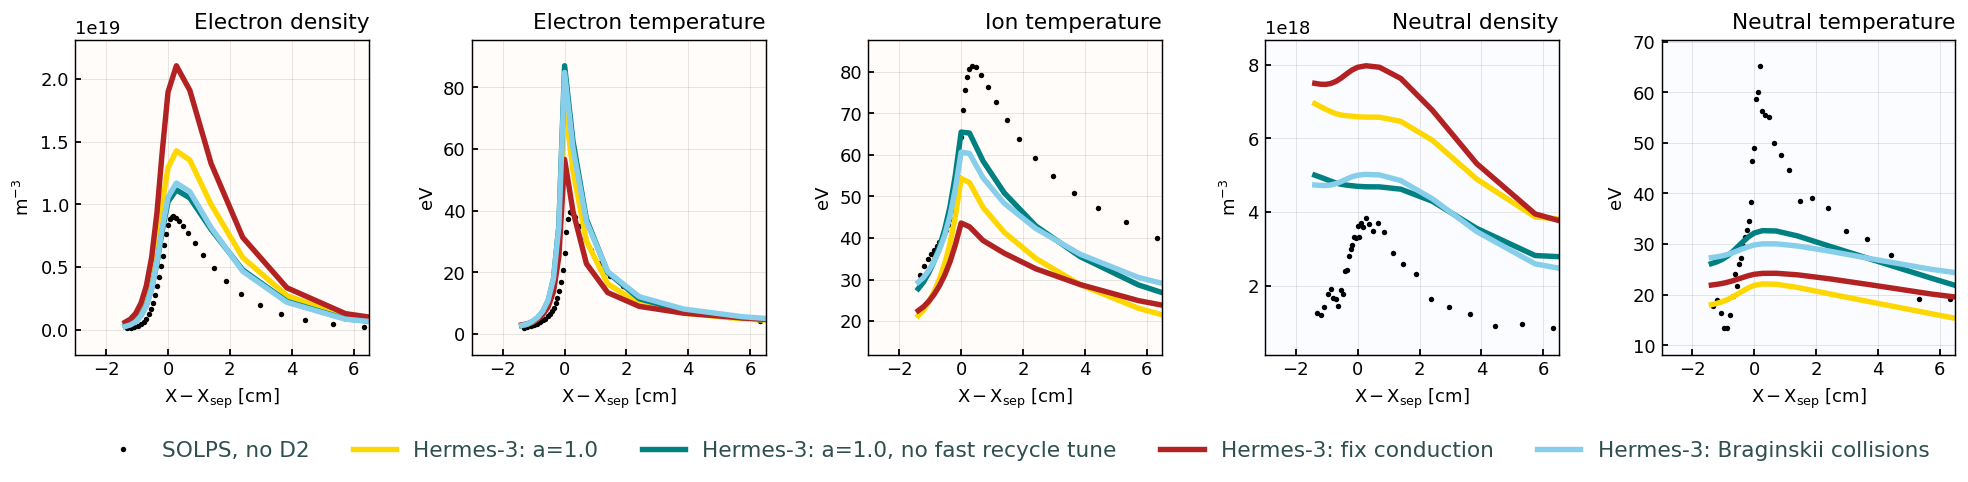

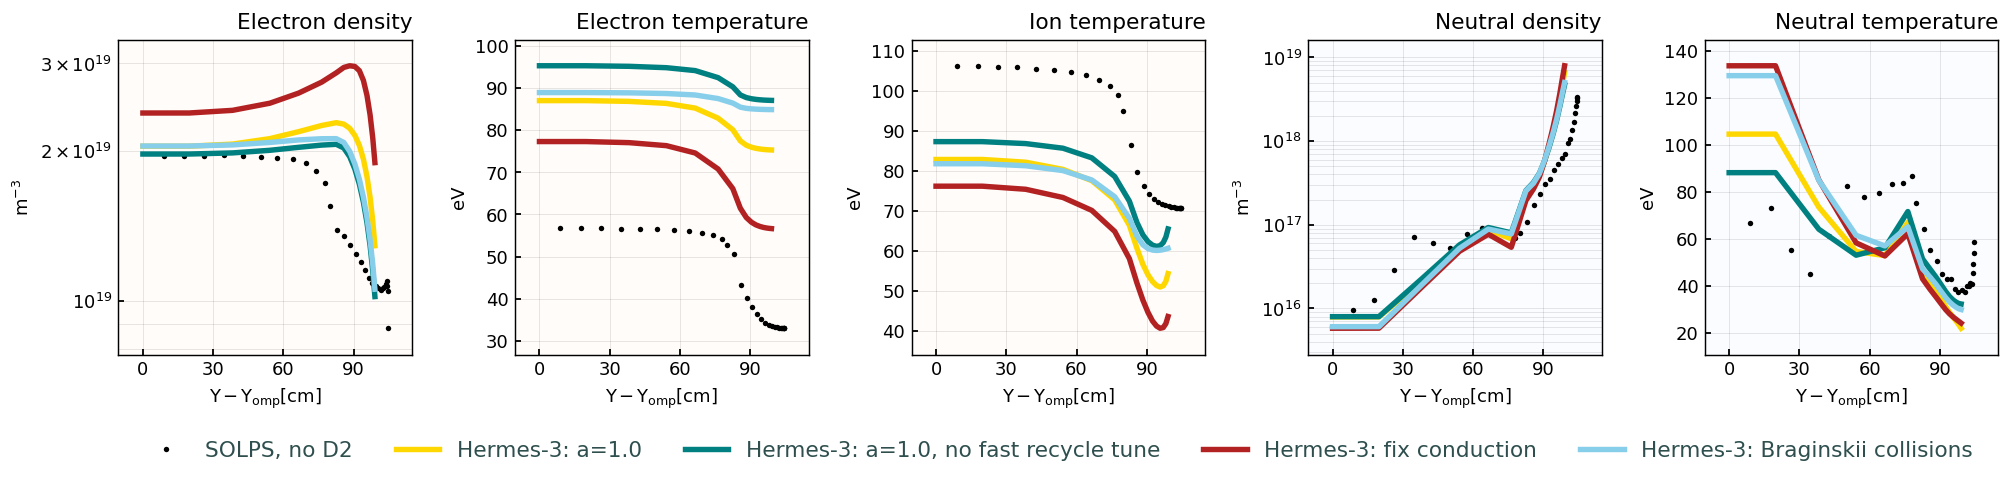

In [10]:
lineplot_compare(
    cases = { 
    "SOLPS, no D2" : dict(data=sp["tightwall_noD2_2e19"], color="black"),
    r"Hermes-3: a=1.0" : dict(data=hr['new_a1.0'], color = "gold"),
    r"Hermes-3: a=1.0, no fast recycle tune" : dict(data=hr['a1.0_frec0.68'], color = "teal"),
    r"Hermes-3: fix conduction" : dict(data=hr['fix_perpcond'], color = "firebrick"),
    r"Hermes-3: Braginskii collisions" : dict(data=hr['braginskii'], color = "skyblue"),

    },
    regions = ["omp", "imp", "outer_lower", "outer_fieldline"],  
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    lw = 2,
    legend_nrows =1,
    combine_molecules = False
)

# Performance

In [8]:
cs.keys()

dict_keys(['fix_eqns', 'new_a0.2', 'new_a0.6', 'new_a1.0'])

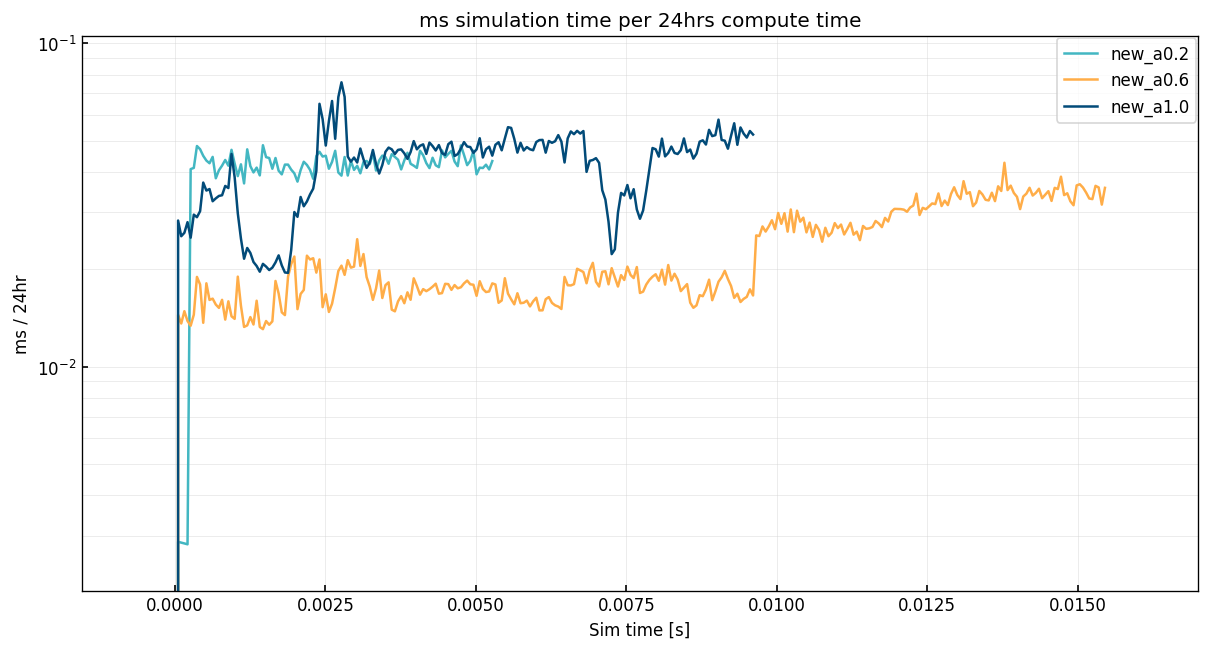

In [4]:
plot_performance(cs)

# Radial neutral transport

In [6]:
for case in cs:
    cs[case].ds = calculate_radial_fluxes(cs[case].ds)

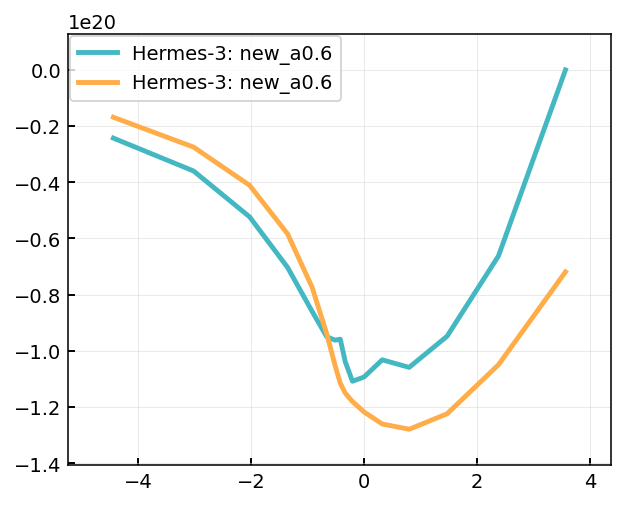

In [37]:
spc = SOLPScase(solpscases["tightwall_noD2_2e19"])
solps = spc.get_1d_radial_data(["rfluxa"], region = "omp")

fig, ax = plt.subplots()
kwargs = dict(lw = 2.5)


ds = cs["new_a0.6"].ds
if "t" in ds.dims: ds = ds.isel(t=-1)
omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
R = omp["dr"].cumsum()
dist = (R - R[ds.metadata["ixseps1"]])
ax.plot(dist*100, omp["pf_perp_diff_R_d"] /  (omp["dy"]*omp["dz"]), **kwargs, label = f"Hermes-3: {case}")
ax.plot(dist*100, omp["ParticleFlow_d_xlow"] /  (omp["dy"]*omp["dz"]) , **kwargs, label = f"Hermes-3: {case}")

# ax.plot(solps.dist*100, solps["rfluxa"], label = "SOLPS", c = "r", lw = 3, alpha = 0.5)
ax.legend()


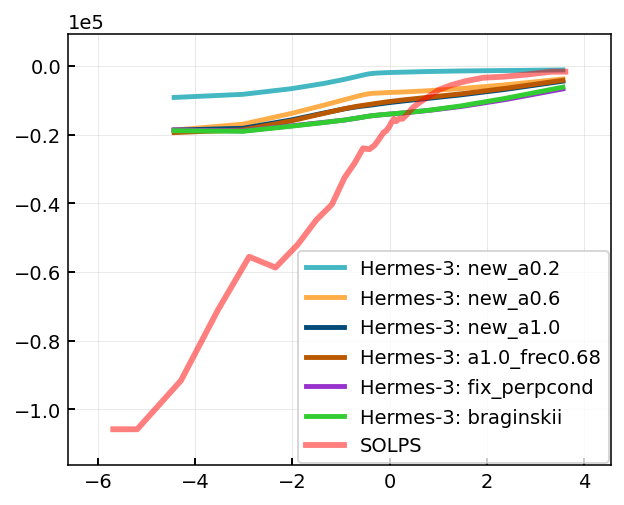

In [33]:
spc = SOLPScase(solpscases["tightwall_noD2_2e19"])
solps = spc.get_1d_radial_data(["rfluxa", "dab2"], region = "omp")

fig, ax = plt.subplots()
kwargs = dict(lw = 2.5)

for case in cs:
# for case in ["fix_eqns", "new_a0.2", "new_a0.6", "new_a1.0"]:
    ds = cs[case].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    R = omp["dr"].cumsum()
    dist = (R - R[ds.metadata["ixseps1"]])
    ax.plot(dist*100, omp["ParticleFlow_d_xlow"] /  (omp["dy"]*omp["dz"]) / omp["Nd"], **kwargs, label = f"Hermes-3: {case}")

ax.plot(solps.dist*100, solps["rfluxa"] /  solps["dab2"], label = "SOLPS", c = "r", lw = 3, alpha = 0.5)
ax.legend()


KeyError: 'ConductionFlow_d_xlow'

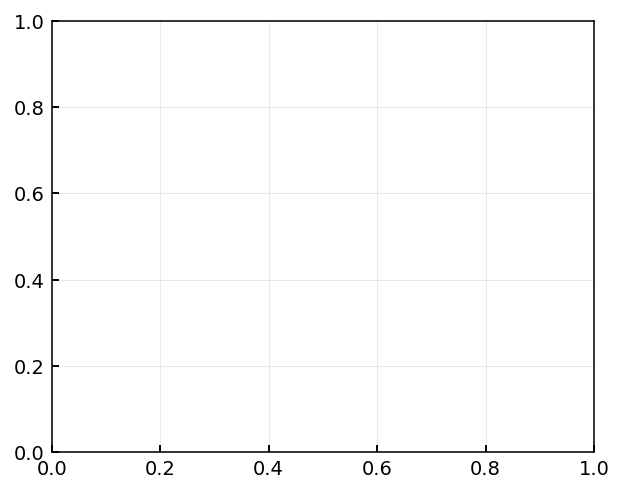

In [28]:
spc = SOLPScase(solpscases["tightwall_noD2_2e19"])
solps = spc.get_1d_radial_data(["rfluxa", "refluxa"], region = "omp")

fig, ax = plt.subplots()
kwargs = dict(lw = 2.5)

for case in cs:
# for case in ["fix_eqns", "new_a0.2", "new_a0.6", "new_a1.0"]:
    ds = cs[case].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    R = omp["dr"].cumsum()
    dist = (R - R[ds.metadata["ixseps1"]])
    ax.plot(dist*100, omp["EnergyFlow_d_xlow"] /  (omp["dy"]*omp["dz"]) + omp["ConductionFlow_d_xlow"] /  (omp["dy"]*omp["dz"]), **kwargs, label = f"Hermes-3: {case}")

ax.plot(solps.dist*100, solps["refluxa"], label = "SOLPS", c = "r", lw = 3, alpha = 0.5)
ax.legend()
ax.set_ylim(-0.3e5, 0)
# ax.set_yscale("symlog")


In [44]:
cs.keys()

dict_keys(['base', 'fix_eqns', 'base_AFN'])

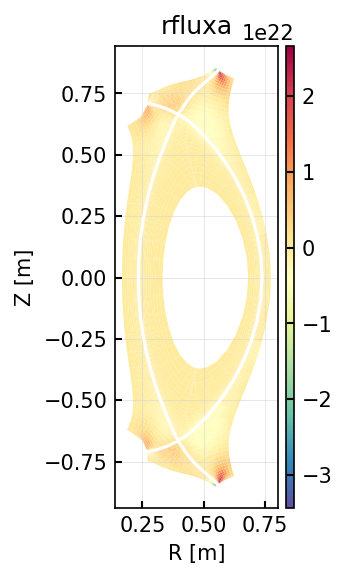

In [52]:
spc.plot_2d("rfluxa", cbar = True, logscale = False, antialias = True)

AttributeError: 'DataArray' object has no attribute 'set_xindex'

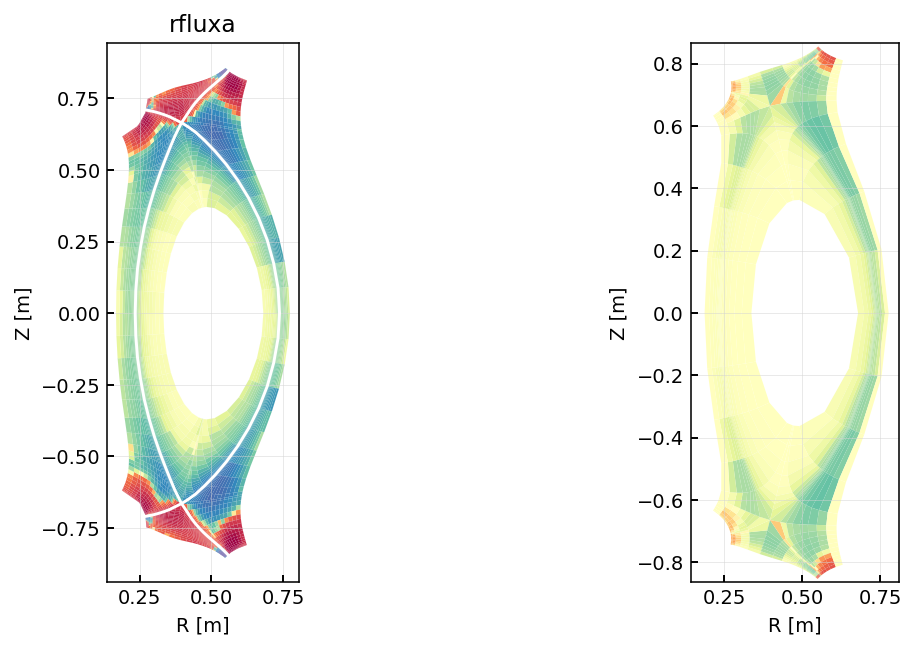

In [13]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
from hermes3.utils import create_norm
norm = create_norm(True, None, -1e22, 1e22, linthresh = 1e20)

## SOLPS
spc = SOLPScase(solpscases["tightwall_noD2_2e19"])
spc.plot_2d("rfluxa", norm = norm,  cbar = False, logscale = False, ax = axes[0], antialias = True)


## SOLEDGE
# slc = SOLEDGEcase(soledgecases["tightwall_2e19"])
# Ti = slc._get_2d_on_tri("Tempi")
# Te = slc._get_2d_on_tri("Tempe")
# ratio = Ti/Te


# slc.plot_2d(fig = fig, ax = axes[1], data = ratio, norm = norm, logscale = False, linewidth = 0)


## Hermes-3
ds = cs["new_a0.6"].ds.isel(t=-1)
(ds["pf_perp_diff_R_d"] /  (ds["dy"]*ds["dz"])).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", logscale = False, add_colorbar = False, norm = norm, antialias = True,
separatrix_kwargs = dict(color = "white", linestyle = "solid"), targets = False)


for ax in axes.flatten():
    # ax.set_ylim(-0.85, 0.05)
    
    # ax.set_xlim(0.2, 0.65)
    ax.set_ylim(-0.85, 0.1)
    ax.set_xlabel("R [m]")
    ax.set_ylabel("Z [m]")
    
    
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = "Spectral_r"), cax = cax, label = "Ti/Te", extend = "both")
    
axes[0].set_title("SOLPS-ITER")
# axes[1].set_title("SOLEDGE2D")
axes[1].set_title("Hermes-3")
fig.subplots_adjust(wspace = 0.25)